In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop_df = pd.read_csv('Crop Production data.csv')

In [3]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
crop_df['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [5]:
crop_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
crop_df.dropna(inplace=True)

In [7]:
crop_df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [8]:
crop_df.State_Name.nunique()

33

In [9]:
crop_df.District_Name.nunique()

646

In [10]:
crop_df.drop_duplicates(inplace=True)

In [11]:
crop_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [12]:
crop_df.Crop.nunique()

124

In [13]:
crop_df.Crop_Year.nunique()

19

In [22]:
crop_df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [14]:
crop_df['Season']=crop_df['Season'].apply(lambda x : x.strip())
crop_df['Crop']=crop_df['Crop'].apply(lambda x : x.strip())
crop_df['State_Name']=crop_df['State_Name'].apply(lambda x : x.strip())

In [15]:
crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Autumn','Kharif'))
crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Summer','Kharif'))
crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Winter','Rabi'))

In [17]:
crop_df.Season.unique()

array(['Kharif', 'Whole Year', 'Rabi'], dtype=object)

In [18]:
crop_df['Season'].value_counts()

Kharif        114024
Rabi           72210
Whole Year     56127
Name: Season, dtype: int64

In [19]:
crop_df.drop(crop_df[crop_df['Production']==0].index,inplace=True)

In [23]:
crop_df.shape

(238838, 7)

In [24]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Papaya','Fruits')
                                    .replace('Mango','Fruits')
                                     .replace('Orange','Fruits')
                                     .replace('Other Fresh Fruits','Fruits')
                                     .replace('Pineapple','Fruits')
                                     .replace('Citrus Fruit','Fruits')
                                     .replace('Pome Fruit','Fruits')
                                     .replace('Pome Granet','Fruits')
                                     .replace('Grapes','Fruits')
                                     .replace('Jack Fruit','Fruits')
                                     .replace('Sapota','Fruits')
                                     .replace('Lemon','Fruits'))

In [25]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Ginger','Dry ginger'))

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Turnip','Onion'))

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Cashewnut Raw','Cashewnut')
                                      .replace('Cashewnut Processed','Cashewnut'))

In [26]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('black gram','gram')
                                     .replace('Moth','gram')
                                     .replace('Blackgram','gram'))

In [27]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)')
                                      .replace('Cotton(lint)','Cotton'))

crop_df.replace('Jute & mesta','Jute',inplace=True)
crop_df.replace('Mesta','Jute',inplace=True)

In [28]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
                                    .replace('Other  Rabi pulses','pulses')
                                    .replace('Peas & beans (Pulses)','pulses')
                                    .replace('Pulses total','pulses')
                                    .replace('other misc. pulses','pulses')
                                    .replace('Moong(Green Gram)','pulses')
                                    .replace('Urad','pulses')
                                    .replace('Arhar/Tur','pulses')
                                    .replace('Bean','pulses')
                                    .replace('Ricebean (nagadal)','pulses')
                                    .replace('Lentil','pulses')
                                    .replace('Masoor','pulses')
                                    .replace('Khesari','pulses')
                                    .replace('Horse-gram','pulses')
                                    .replace('Rajmash Kholar','pulses'))

In [29]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Oilseeds total' ,'other oilseeds')
                                      .replace('Niger seed' ,'other oilseeds'))

In [30]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Other Cereals & Millets' ,'Bajra')
                                      .replace('Samai' ,'Bajra')
                                      .replace('Small millets' ,'Bajra')
                                      .replace('Ragi','Bajra')
                                      .replace('Varagu','Bajra')
                                      .replace('Jobster','Bajra'))

In [31]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                     .replace('Coriander' ,'Other Vegetables')
                                     .replace('pulsess & Mutter(Vegetable)' ,'Other Vegetables')
                                     .replace('Bhindi' ,'Other Vegetables')
                                     .replace('Tomato','Other Vegetables')
                                     .replace('Cowpea(Lobia)','Other Vegetables')
                                     .replace('Cabbage','Other Vegetables')
                                     .replace('Carrot','Other Vegetables')
                                     .replace('Drum Stick','Other Vegetables')
                                     .replace('Redish','Other Vegetables')
                                     .replace('Cauliflower','Other Vegetables')
                                     .replace('Colocosia','Other Vegetables')
                                     .replace('Brinjal','Other Vegetables')
                                     .replace('Bottle Gourd','Other Vegetables')
                                     .replace('Bitter Gourd','Other Vegetables'))

In [32]:
crop_df.drop(crop_df[crop_df['Crop']=='Tea'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Coffee'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Rubber'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Cond-spcs other'].index,inplace=True)

In [33]:
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Korra','Total foodgrain'))
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [34]:
crop_df.Crop.unique()

array(['Arecanut', 'pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut',
       'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Groundnut', 'Sunflower', 'Bajra', 'Castor seed',
       'Cotton', 'Jowar', 'Total foodgrain', 'Tobacco', 'Gram', 'Wheat',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Vegetables',
       'Potato', 'Fruits', 'Soyabean', 'Jute', 'Rapeseed &Mustard',
       'Garlic', 'gram', 'Barley', 'Sannhamp', 'Guar seed',
       'Arcanut (Processed)', 'Atcanut (Raw)', 'Cardamom', 'Perilla'],
      dtype=object)

In [35]:
crop_df.to_csv('Crop_clean.csv')

In [36]:
crop_df['Producation_area_factor']= crop_df['Production'] / crop_df['Area']

In [37]:
crop_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,2.141848


In [38]:
Q1 = crop_df['Area'].quantile(0.25)
Q3 = crop_df['Area'].quantile(0.75)
Q1, Q3

(91.0, 4700.0)

In [39]:
IQR = Q3 - Q1

In [40]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-6822.5, 11613.5)

In [41]:
area_outlier = crop_df[(crop_df['Area'] < lower_limit) | (crop_df['Area'] > upper_limit)]

In [42]:
area_outlier['Crop'].value_counts()

Rice                   9138
Wheat                  5080
pulses                 4668
Maize                  2514
Bajra                  2312
Gram                   1974
Jowar                  1902
Cotton                 1474
Rapeseed &Mustard      1469
Groundnut              1449
Sugarcane              1321
Soyabean               1069
Sesamum                 574
Coconut                 556
Sunflower               498
Potato                  387
Jute                    298
Guar seed               246
Castor seed             241
other oilseeds          238
Dry chillies            173
Cashewnut               163
Arecanut                155
Barley                  154
Total foodgrain         153
Tobacco                 144
Safflower               137
Other Vegetables        111
gram                    103
Linseed                  99
Tapioca                  93
Onion                    83
Fruits                   63
Black pepper             55
Banana                   33
Turmeric            

In [43]:
West_India= ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India= ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand' ]
North_India=['Jammu and Kashmir ','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [46]:
area_zone = []

for state in crop_df['State_Name']:
    if state in West_India:
         area_zone.append('West India')
    elif state in East_India:
         area_zone.append('EastIndia')
    elif state in North_India:
         area_zone.append('North India')
    elif state in South_India: 
         area_zone.append('South India')
    else:
         area_zone.append('Union Territory')

In [47]:
crop_df['area_zone'] = area_zone

In [48]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor,area_zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,Union Territory


In [49]:
crop_df.drop(crop_df[crop_df['Crop_Year'] == 2015].index,inplace=True)

In [50]:
val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

C:\Users\dell\AppData\Local\Temp\ipykernel_11928\1138868194.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
C:\Users\dell\AppData\Local\Temp\ipykernel_11928\1138868194.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index


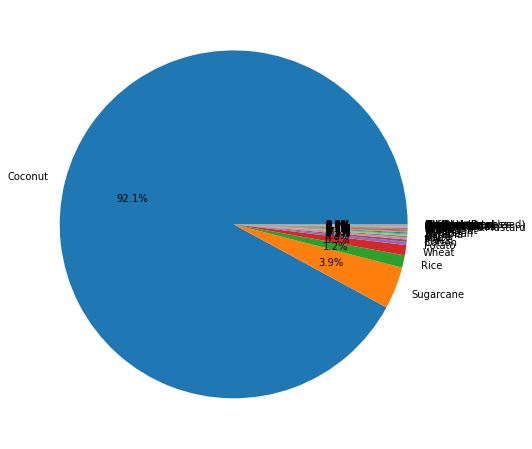

In [51]:
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [52]:
coconut_df = crop_df[crop_df['Crop'] == 'Coconut']

coconut_df.to_csv('coconut_df.csv')

crop_df.drop(crop_df[crop_df['Crop']=='Coconut'].index,inplace=True)

In [53]:
val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

C:\Users\dell\AppData\Local\Temp\ipykernel_11928\1138868194.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
C:\Users\dell\AppData\Local\Temp\ipykernel_11928\1138868194.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index


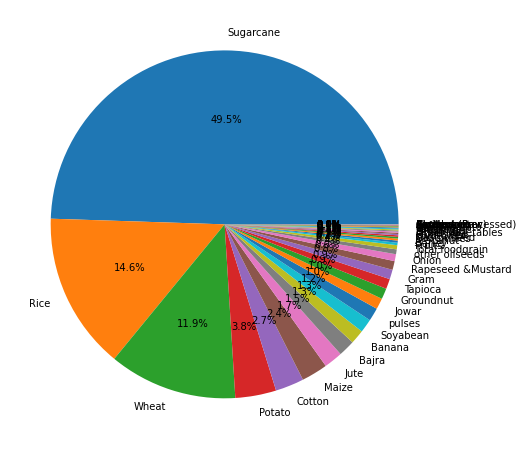

In [56]:
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [57]:
crop_df.to_csv('final_crop.csv')